In [3]:
# Instalando o pacote de financias e incluindo pacotes para calculos posteriores

!pip install yfinance --upgrade --no-cache-dir

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Escolhendo 3 ações do portifólio de investimentos

acoes = ['VALE3.SA', 'HYPE3.SA', 'EQTL3.SA']

ydata = yf.download(acoes, '2015-01-01', '2019-12-31', '1d');

print(ydata.columns)

dados = ydata['Adj Close'] if 'Adj Close' in ydata.columns else ydata['Close']

[*********************100%***********************]  3 of 3 completed

MultiIndex([(       'Close', 'EQTL3.SA'),
            (       'Close', 'HYPE3.SA'),
            (       'Close', 'VALE3.SA'),
            (   'Dividends', 'EQTL3.SA'),
            (   'Dividends', 'HYPE3.SA'),
            (   'Dividends', 'VALE3.SA'),
            (        'High', 'EQTL3.SA'),
            (        'High', 'HYPE3.SA'),
            (        'High', 'VALE3.SA'),
            (         'Low', 'EQTL3.SA'),
            (         'Low', 'HYPE3.SA'),
            (         'Low', 'VALE3.SA'),
            (        'Open', 'EQTL3.SA'),
            (        'Open', 'HYPE3.SA'),
            (        'Open', 'VALE3.SA'),
            ('Stock Splits', 'EQTL3.SA'),
            ('Stock Splits', 'HYPE3.SA'),
            ('Stock Splits', 'VALE3.SA'),
            (      'Volume', 'EQTL3.SA'),
            (      'Volume', 'HYPE3.SA'),
            (      'Volume', 'VALE3.SA')],
           names=['Price', 'Ticker'])


In [4]:
# Definindo variáveis

dados = dados *100 / dados.iloc[0]
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)
ret_acc = (dados.iloc[-1] / dados.iloc[0])-1
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5))-1
vol_aa = dados_chg.std()*np.sqrt(252)

In [5]:
# Criando uma definição para calcular a relatividade e volatividade entre ativos

def calc_ret_vol(ativos, ativos_chg, port_pesos):
  port = ativos.dot(port_pesos)
  port_chg =port.pct_change()
  port_chg = port_chg.fillna(0)
  ret = ((port.iloc[-1]/port.iloc[0])**(1/5))-1
  vol = port_chg.std()*np.sqrt(252)
  return ret, vol

In [6]:
# Encontrando a menor relatividade entre 2 ativos: EQTL3 e HYPE3
points = []
min_vol_ret = [100, 0] #[vol, ret]
port_pesos = [0, 0, 0]
for w in range(0, 101, 5):
  ret, vol = calc_ret_vol(dados, dados_chg, [w/100,(1-w/100), 0])
  print(f"Aloc:{round(w/100, 2):.2f} {round(1-(w/100),2):.2f} Ret:{round(ret, 3):.3f} Vol:{round(vol, 3):.3f}")
  points.append([ret, vol])
  if vol < min_vol_ret[0]:
    min_vol_ret[0] = vol
    min_vol_ret[1] = ret
    port_pesos[0] = w/100
    port_pesos[1] = 1-w/100

Aloc:0.00 1.00 Ret:0.203 Vol:0.287
Aloc:0.05 0.95 Ret:0.212 Vol:0.274
Aloc:0.10 0.90 Ret:0.221 Vol:0.262
Aloc:0.15 0.85 Ret:0.230 Vol:0.251
Aloc:0.20 0.80 Ret:0.239 Vol:0.241
Aloc:0.25 0.75 Ret:0.247 Vol:0.232
Aloc:0.30 0.70 Ret:0.255 Vol:0.224
Aloc:0.35 0.65 Ret:0.263 Vol:0.218
Aloc:0.40 0.60 Ret:0.271 Vol:0.213
Aloc:0.45 0.55 Ret:0.278 Vol:0.209
Aloc:0.50 0.50 Ret:0.286 Vol:0.206
Aloc:0.55 0.45 Ret:0.293 Vol:0.205
Aloc:0.60 0.40 Ret:0.300 Vol:0.205
Aloc:0.65 0.35 Ret:0.307 Vol:0.206
Aloc:0.70 0.30 Ret:0.314 Vol:0.208
Aloc:0.75 0.25 Ret:0.320 Vol:0.211
Aloc:0.80 0.20 Ret:0.327 Vol:0.215
Aloc:0.85 0.15 Ret:0.333 Vol:0.220
Aloc:0.90 0.10 Ret:0.339 Vol:0.225
Aloc:0.95 0.05 Ret:0.346 Vol:0.232
Aloc:1.00 0.00 Ret:0.352 Vol:0.239


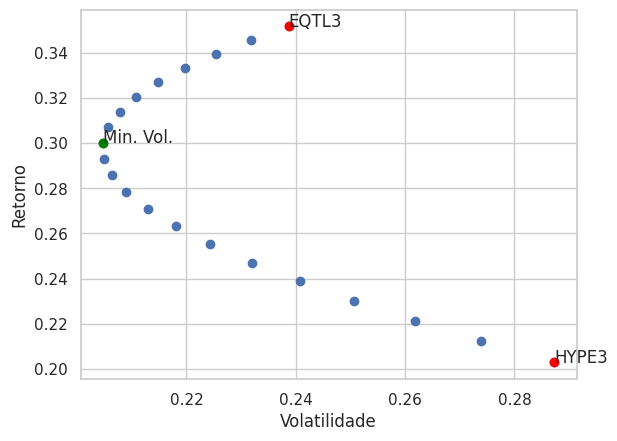

In [7]:
# Criando o gráfico da Fronteira eficiente (2 ativos)

lp = np.array(points).T
plt.scatter(lp[[1][:]],lp[[0][:]]);
plt.ylabel("Retorno");
plt.xlabel("Volatilidade");

plt.scatter(vol_aa['EQTL3.SA'], ret_aa['EQTL3.SA'], color='red');
plt.text(vol_aa['EQTL3.SA'], ret_aa['EQTL3.SA'], 'EQTL3');

plt.scatter(vol_aa['HYPE3.SA'], ret_aa['HYPE3.SA'], color='red');
plt.text(vol_aa['HYPE3.SA'], ret_aa['HYPE3.SA'], 'HYPE3');

plt.scatter(min_vol_ret[0], min_vol_ret[1], color='green');
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min. Vol.');

In [8]:
# Criando a variável portifólio com 2 ativos

dados['PORT1'] = dados.dot(port_pesos)
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

<ipython-input-9-e38d98748373>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
<ipython-input-9-e38d98748373>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
<ipython-input-9-e38d98748373>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
<ipython-input-9-e38d98748373>:6: FutureWarning: Series.__getitem__ treating keys as pos

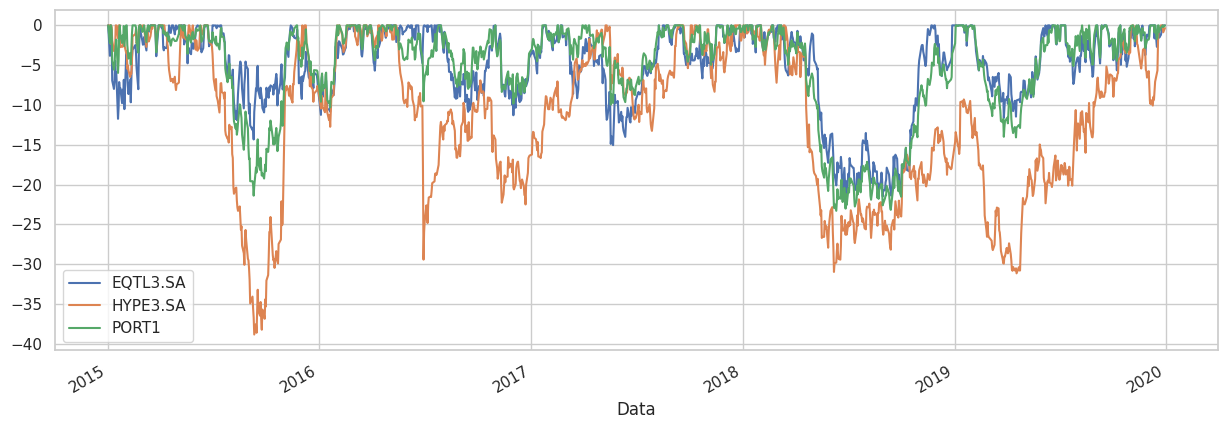

In [9]:
# Definindo o cálculo do Drawdown
ddown = pd.DataFrame()

for ativo in dados.columns:
  list = []
  for ind in range(dados.count()[0]):
    list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind+1].max()-1)*100)
  ddown[ativo]=list

ddown['Data']=dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

# Gráfico de Drawdown para: EQTL3.SA, HYPE3.SA, PORT1 (Portifólio com 2 ativos)

ddown[['EQTL3.SA', 'HYPE3.SA', 'PORT1']].plot(figsize = (15,5));

In [10]:
# Rentabilidade e Volatilidade para: EQTL3.SA, HYPE3.SA, PORT1 (Portifólio com 2 ativos)

ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5))-1
print("Rentabilidade anual:")
print(ret_aa[['EQTL3.SA','HYPE3.SA','PORT1']])
vol_aa = dados_chg.std()*np.sqrt(252)
print("Volatilidade anual:")
print(vol_aa[['EQTL3.SA','HYPE3.SA','PORT1']])

Rentabilidade anual:
Ticker
EQTL3.SA    0.351610
HYPE3.SA    0.202846
PORT1       0.300053
dtype: float64
Volatilidade anual:
Ticker
EQTL3.SA    0.238703
HYPE3.SA    0.287258
PORT1       0.204756
dtype: float64


In [11]:
# Encontrando a menor relatividade entre 3 ativos: EQTL3, HYPE3 e VALE3

points = []
min_vol_ret = [100, 0]
port_pesos = [0, 0, 0, 0]
for w1 in range(0, 101, 5):
  for w2 in range(0, 101-w1, 5):
    ret, vol = calc_ret_vol(dados, dados_chg, [w1/100, w2/100, (1-w1/100-w2/100), 0])
    print("Aloc:", round(w1/100, 2), round(w2/100, 2), round(1-w1/100-w2/100, 2), "Ret:", round(ret, 3), "Vol:", round(vol, 3))
    print(f"Aloc:{round(w1/100, 2):.2f} {round(w2/100, 2):.2f} {round(1-w1/100-w2/100, 2):.2f} Ret:{round(ret, 3):.3f} Vol:{round(vol, 3):.3f}")
    points.append([ret, vol])
    if vol < min_vol_ret[0]:
      min_vol_ret[0] = vol
      min_vol_ret[1] = ret
      port_pesos[0] = w1/100
      port_pesos[1] = w2/100
      port_pesos[2] = 1-w1/100-w2/100

Aloc: 0.0 0.0 1.0 Ret: 0.243 Vol: 0.488
Aloc:0.00 0.00 1.00 Ret:0.243 Vol:0.488
Aloc: 0.0 0.05 0.95 Ret: 0.241 Vol: 0.455
Aloc:0.00 0.05 0.95 Ret:0.241 Vol:0.455
Aloc: 0.0 0.1 0.9 Ret: 0.239 Vol: 0.426
Aloc:0.00 0.10 0.90 Ret:0.239 Vol:0.426
Aloc: 0.0 0.15 0.85 Ret: 0.237 Vol: 0.399
Aloc:0.00 0.15 0.85 Ret:0.237 Vol:0.399
Aloc: 0.0 0.2 0.8 Ret: 0.235 Vol: 0.375
Aloc:0.00 0.20 0.80 Ret:0.235 Vol:0.375
Aloc: 0.0 0.25 0.75 Ret: 0.233 Vol: 0.353
Aloc:0.00 0.25 0.75 Ret:0.233 Vol:0.353
Aloc: 0.0 0.3 0.7 Ret: 0.231 Vol: 0.333
Aloc:0.00 0.30 0.70 Ret:0.231 Vol:0.333
Aloc: 0.0 0.35 0.65 Ret: 0.229 Vol: 0.316
Aloc:0.00 0.35 0.65 Ret:0.229 Vol:0.316
Aloc: 0.0 0.4 0.6 Ret: 0.227 Vol: 0.301
Aloc:0.00 0.40 0.60 Ret:0.227 Vol:0.301
Aloc: 0.0 0.45 0.55 Ret: 0.225 Vol: 0.287
Aloc:0.00 0.45 0.55 Ret:0.225 Vol:0.287
Aloc: 0.0 0.5 0.5 Ret: 0.223 Vol: 0.276
Aloc:0.00 0.50 0.50 Ret:0.223 Vol:0.276
Aloc: 0.0 0.55 0.45 Ret: 0.221 Vol: 0.267
Aloc:0.00 0.55 0.45 Ret:0.221 Vol:0.267
Aloc: 0.0 0.6 0.4 Ret: 0.219

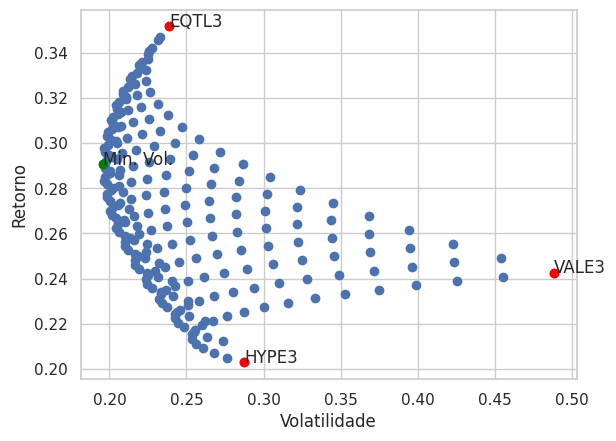

In [12]:
# Criando o gráfico da Fronteira eficiente (3 ativos)

lp = np.array(points).T
plt.scatter(lp[[1][:]],lp[[0][:]]);
plt.ylabel("Retorno");
plt.xlabel("Volatilidade");

plt.scatter(vol_aa['EQTL3.SA'], ret_aa['EQTL3.SA'], color='red');
plt.text(vol_aa['EQTL3.SA'], ret_aa['EQTL3.SA'], 'EQTL3');

plt.scatter(vol_aa['HYPE3.SA'], ret_aa['HYPE3.SA'], color='red');
plt.text(vol_aa['HYPE3.SA'], ret_aa['HYPE3.SA'], 'HYPE3');

plt.scatter(vol_aa['VALE3.SA'], ret_aa['VALE3.SA'], color='red');
plt.text(vol_aa['VALE3.SA'], ret_aa['VALE3.SA'], 'VALE3');

plt.scatter(min_vol_ret[0], min_vol_ret[1], color='green');
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min. Vol.');

In [13]:
# Criando a variável portifólio com 3 ativos

dados['PORT2'] = dados.dot(port_pesos)
dados_chg = (dados - dados.shift(1)) / dados.shift(1)
dados_chg = dados_chg.fillna(0)

In [14]:
# Rentabilidade e Volatilidade para: EQTL3.SA, HYPE3.SA, VALE3.SA, PORT2 (Portifólio com 3 ativos)

ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5))-1
print("Rentabilidade anual:")
print(ret_aa[['EQTL3.SA','HYPE3.SA','VALE3.SA','PORT2']])
vol_aa = dados_chg.std()*np.sqrt(252)
print("Volatilidade anual:")
print(vol_aa[['EQTL3.SA','HYPE3.SA','VALE3.SA','PORT2']])

Rentabilidade anual:
Ticker
EQTL3.SA    0.351610
HYPE3.SA    0.202846
VALE3.SA    0.242554
PORT2       0.290627
dtype: float64
Volatilidade anual:
Ticker
EQTL3.SA    0.238703
HYPE3.SA    0.287258
VALE3.SA    0.488482
PORT2       0.195954
dtype: float64


<ipython-input-15-7e2cd6807112>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
<ipython-input-15-7e2cd6807112>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
<ipython-input-15-7e2cd6807112>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
<ipython-input-15-7e2cd6807112>:7: FutureWarning: Series.__getitem__ treating keys as

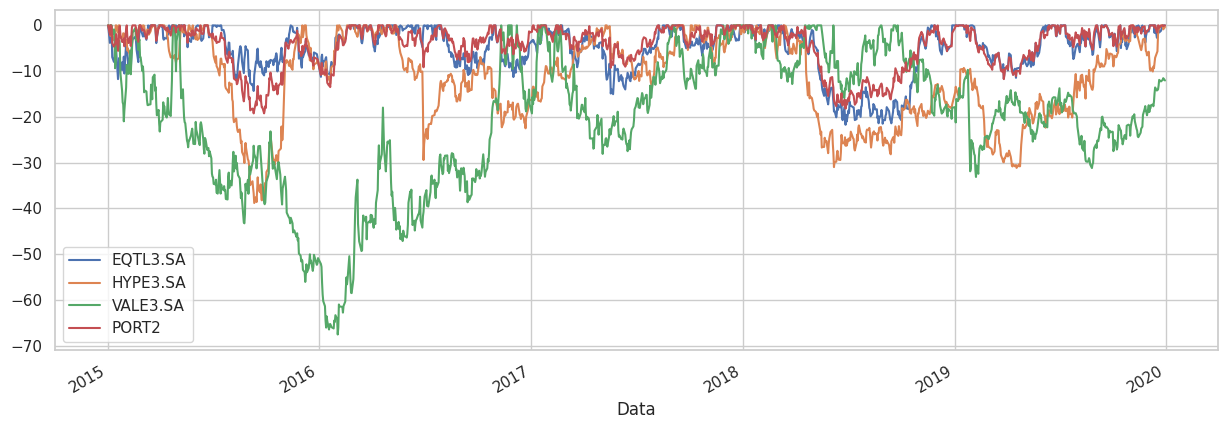

In [15]:
#Calculo Drawdown

ddown = pd.DataFrame()

for ativo in dados.columns:
  list = []
  for ind in range(dados.count()[0]):
    list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind+1].max()-1)*100)
  ddown[ativo]=list

ddown['Data']=dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

# Gráfico de Drawdown para: EQTL3.SA, HYPE3.SA, VALE3.SA, PORT2 (Portifólio com 3 ativos)

ddown[['EQTL3.SA','HYPE3.SA','VALE3.SA','PORT2']].plot(figsize = (15,5));